In [263]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sympy
from pylab import *
import matplotlib.animation as animation
from IPython import display
import math
import pandas as pd

### 1a 
plotting (x,v)

In [264]:
def file_process(s):
    f = open(s, "r")
    lines = f.readlines()
    f.close()
    convert = []
    result = []

    for line in lines:
        for element in line.split():
            convert.append(float(element))
        result.append(convert)
        convert = []

    result = np.array(result)
    return result

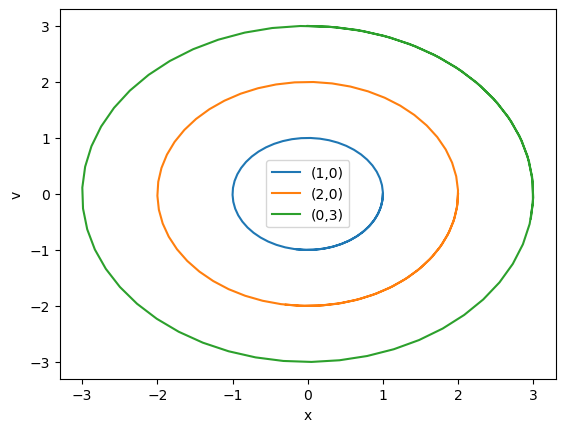

In [265]:
# reading from files
result1 = file_process("result1_l.txt")
result2 = file_process("result2_l.txt")
result3 = file_process("result3_l.txt")


# getting data and plotting
time = result1[:,0]
x = result1[:,2]
v = result1[:,3]
plt.plot(x, v, label = "(1,0)")

time = result2[:,0]
x = result2[:,2]
v = result2[:,3]
plt.plot(x, v, label = "(2,0)")

time = result3[:,0]
x = result3[:,2]
v = result3[:,3]
plt.plot(x, v, label = "(0,3)")

# set label
plt.xlabel("x")
plt.ylabel("v")

plt.legend()
plt.show()

### 1b
non linear

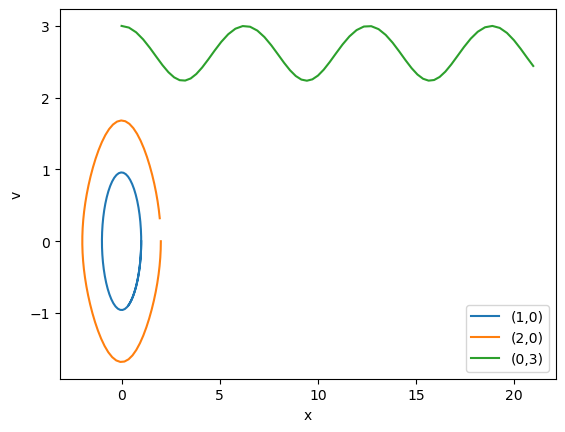

In [266]:
result1 = file_process("result1.txt")
result2 = file_process("result2.txt")
result3 = file_process("result3.txt")

time = result1[:,0]
x = result1[:,2]
v = result1[:,3]
plt.plot(x, v, label = "(1,0)")

time = result2[:,0]
x = result2[:,2]
v = result2[:,3]
plt.plot(x, v, label = "(2,0)")

time = result3[:,0]
x = result3[:,2]
v = result3[:,3]
plt.plot(x, v, label = "(0,3)")
plt.xlabel("x")
plt.ylabel("v")

plt.legend()
plt.show()

# 1c
in 1c.py

# 1d

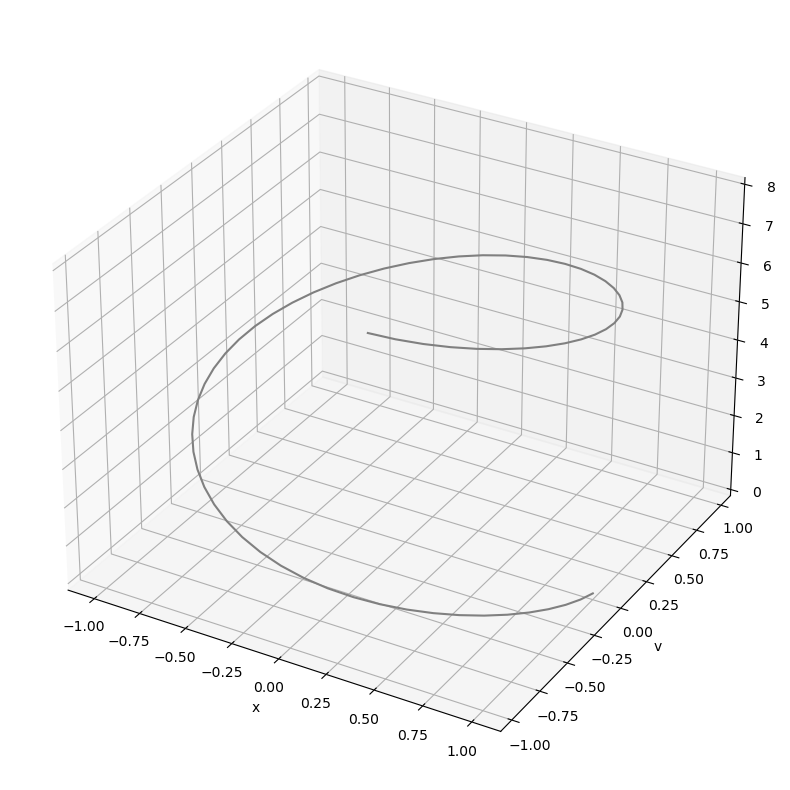

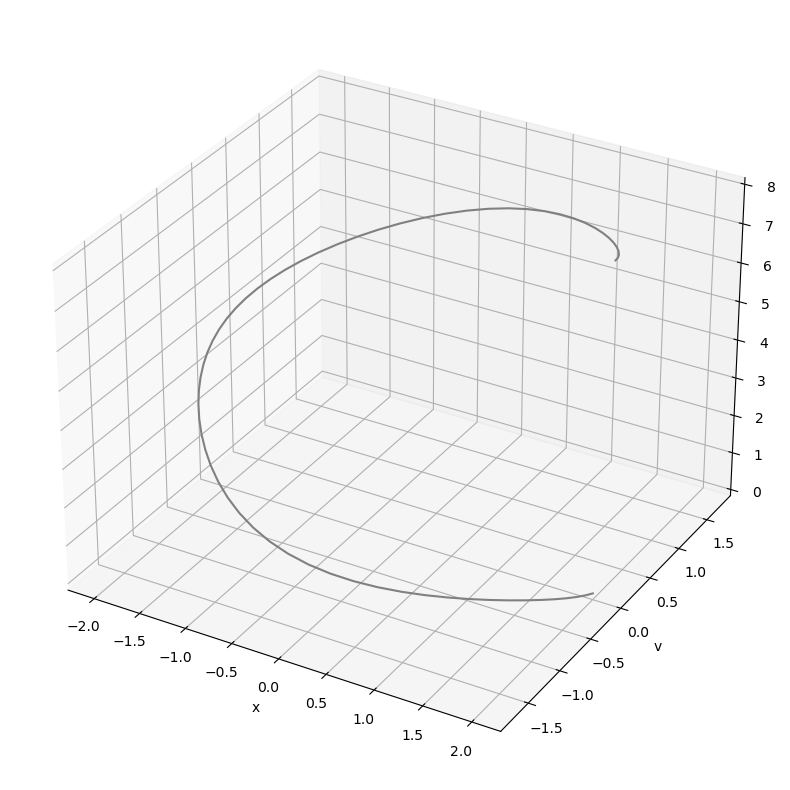

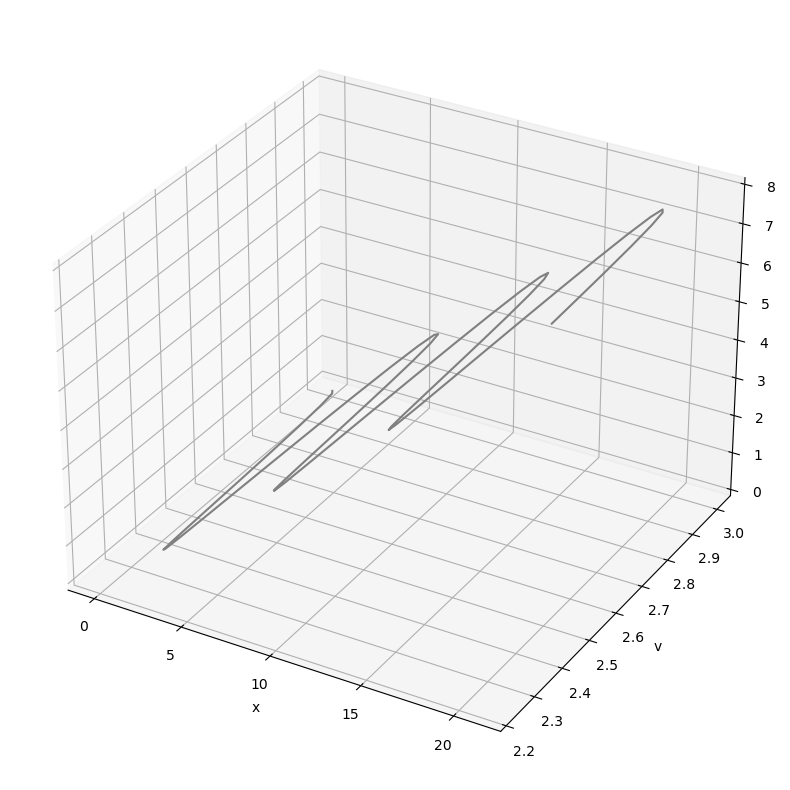

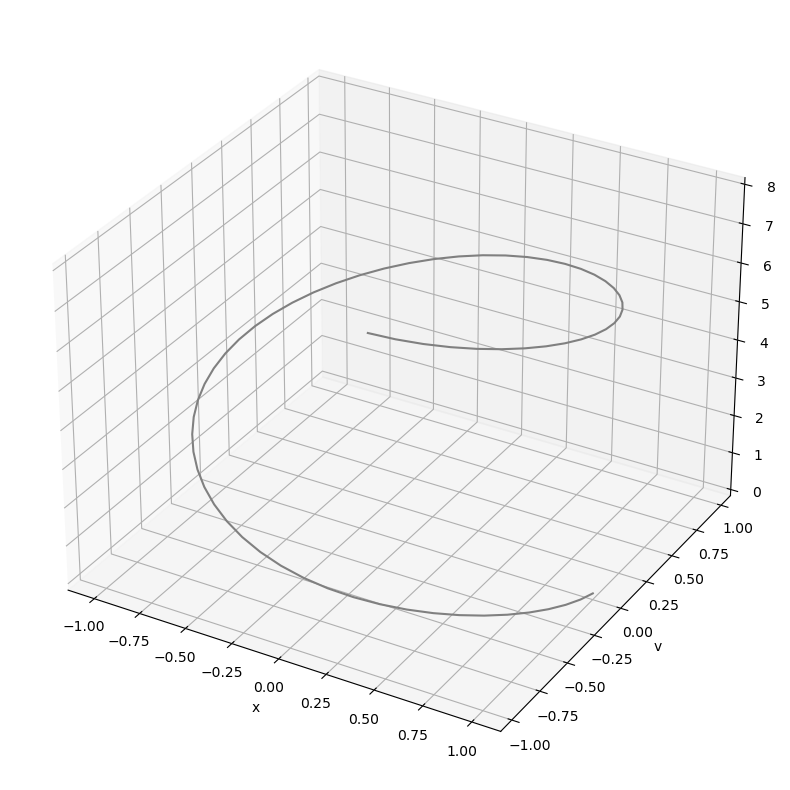

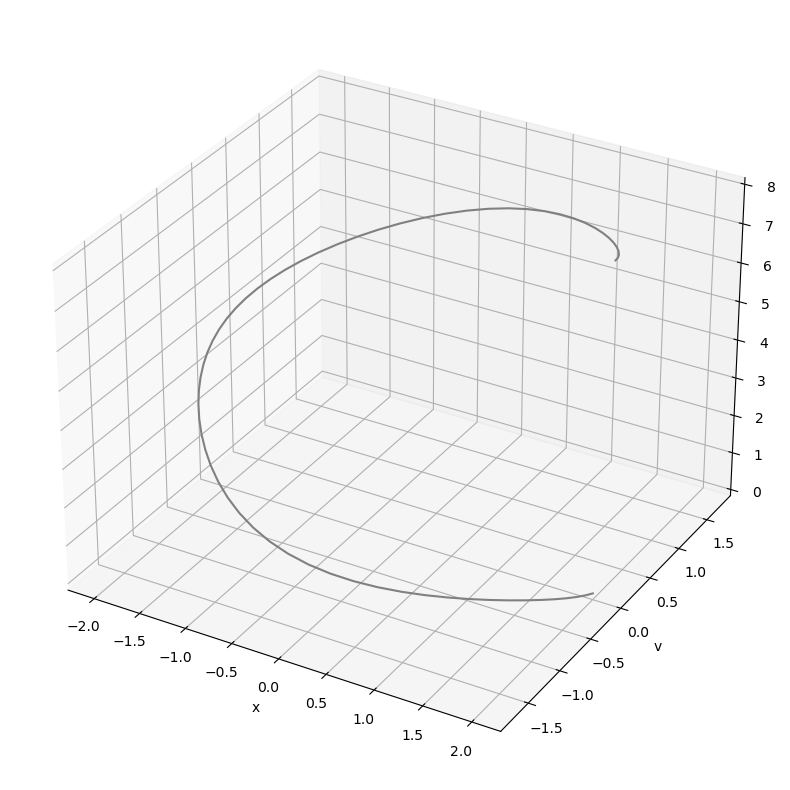

In [273]:
# getting data and plotting


time = result1[:,0]
x = result1[:,2]
v = result1[:,3]

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
ax.plot3D(x, v, time, 'gray')
ax.set_xlabel("x")
ax.set_ylabel("v")
ax.set_zlabel("t")
plt.show()

time = result2[:,0]
x = result2[:,2]
v = result2[:,3]
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
ax.plot3D(x, v, time, 'gray')
ax.set_xlabel("x")
ax.set_ylabel("v")
ax.set_zlabel("t")
plt.show()

time = result3[:,0]
x = result3[:,2]
v = result3[:,3]
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
ax.plot3D(x, v, time, 'gray')
ax.set_xlabel("x")
ax.set_ylabel("v")
ax.set_zlabel("t")
plt.show()

time = result1[:,0]
x = result1[:,2]
v = result1[:,3]
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
ax.plot3D(x, v, time, 'gray')
ax.set_xlabel("x")
ax.set_ylabel("v")
ax.set_zlabel("t")
plt.show()

time = result2[:,0]
x = result2[:,2]
v = result2[:,3]
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
ax.plot3D(x, v, time, 'gray')
ax.set_xlabel("x")
ax.set_ylabel("v")
ax.set_zlabel("t")
plt.show()

time = result3[:,0]
x = result3[:,2]
v = result3[:,3]
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
ax.plot3D(x, v, time, 'gray')
ax.set_xlabel("x")
ax.set_ylabel("v")
ax.set_zlabel("t")
plt.close()

# 2a
orbital simulation


In [268]:





def leapstep(x, v, n, dt, G, M, sun_pos, debugger):
    """LEAPSTEP: take one step using the leapfrog integrator, formulated
    as a mapping from t to t + dt.  WARNING: this integrator is not
    accurate unless the timestep dt is fixed from one call to another.
    Args:
        x (np.array): positions of all points
        v (np.array): velocities of all points
        n (int): number of planets
        dt (float): timestep for integration
        sun_pos (3-d np.array): position of the sun
        debugger: debug purposes (not using)
    Returns:
        x: positions
        v: velocities
    """
    
    v = v + 0.5*dt*accel(x,n,G,M,sun_pos)
    x = x + v*dt
    v = v + 0.5*dt*accel(x,n,G, M, sun_pos)


    return x,v


def accel(x: np.ndarray, n: int, G: float, M: float, sun_pos: np.ndarray):
    """ACCEL: compute accelerations for harmonic oscillator(s)
    Args:
        x a (array of shape (n, 3)): positions of planets
        n (int): number of planets
        G (float): gravitational constant
        M (float): mass of sun
        sun_pos a (array of shape (1,3)): position of the sun
    
    Returns:
        a (array of shape (N, 3)): accelerations of points
    """
    a = np.zeros((n,3))
    for i in range(n):
        r_vec = x[i] - sun_pos
        r_mag = np.linalg.norm(r_vec) #np.sqrt((r_vec**2).sum())
        acc = -(G*M*r_vec/r_mag**3)
        a[i] = acc
    return a

def save_state(n, x, tnow, storage):
    """Save the current state to array.

    Args:
        n : size
        x (array of shape (N, 3)): positions of all points
        tnow (float): current time, in 0.01 year
        storage (python array): storing time, planet_label, r_x, r_y, r_z
    """
    for i in range(n):  # loop over all points...
        storage.append([tnow, i, x[i][0], x[i][1], x[i][2]])



In [269]:
def main():

    # first, set up constants
    n = 9  # set number of points
    tnow = 0.0  # intial time in days
    tmax = 100000
    dt = 1  # day
    mstep = tmax / dt # total number of time steps
    x = np.zeros((n,3)) # position vector 
    v = np.zeros((n,3)) # velocity vector

    # Gravitational constant and Sun's mass
    G = 2.959159*10**(-4)
    M = 1


    # set initial position and velocity 
    f = open("initial_condition.txt", "r")
    content = f.readlines()
    f.close()
    for i in range(n):
        line = content[i].replace('\n', '').split()
        x[i] = [float(line[0]), float(line[1]), float(line[2])]
        v[i] = [float(line[3]), float(line[4]), float(line[5])]
    sun_pos = np.array([0.0, 0.0, 0.0])


    # delete old output if it exists
    # if os.path.exists("solar.py.data"):
    #     os.remove("solar.py.data")    

    result = []

    save_state(n,x,tnow, result)

    # leapfrog integration
    for i in range(int(mstep)):
        x, v = leapstep(x,v,n,dt,G,M, sun_pos, debugger=i)
        tnow = tnow + dt
        save_state(n, x, tnow, result)

    result = np.array(result)
    df = pd.DataFrame(result, columns=["time", "planet_label", "r_x", "r_y", "r_z"])
    return df

data_sim = main()

# 2b 


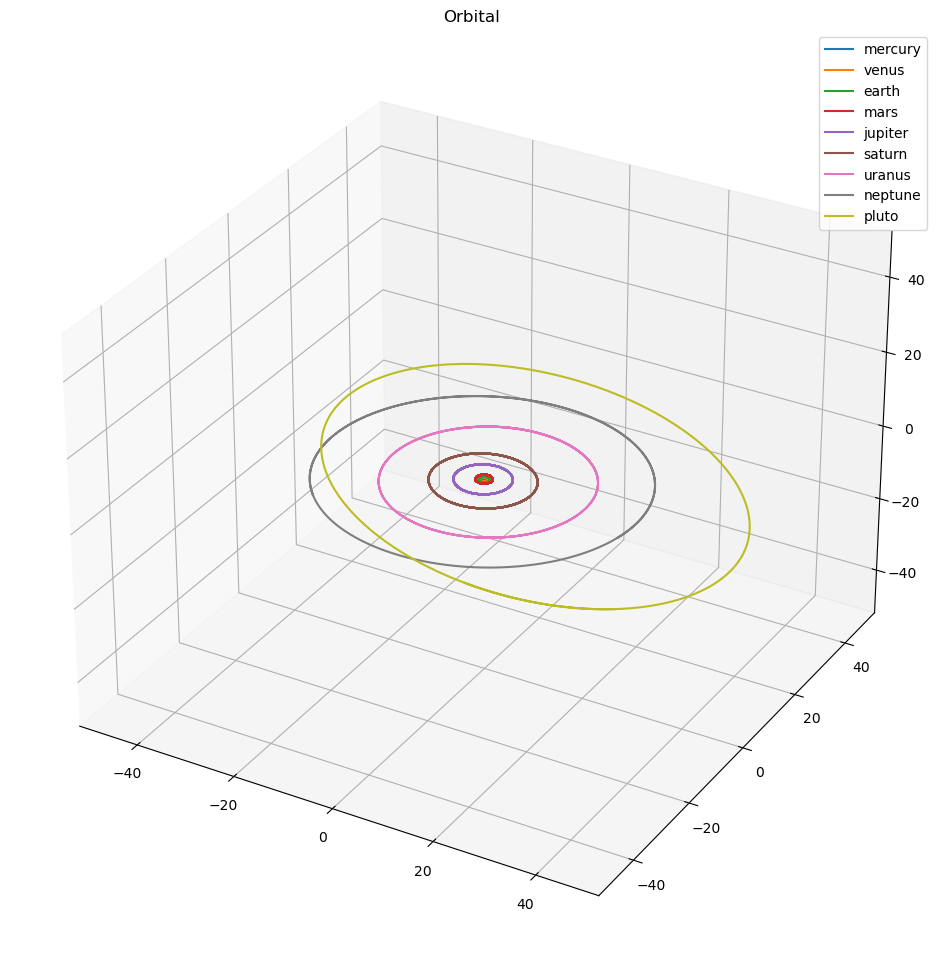

In [270]:
# order: mercury, venus, earth, mars, jupiter, saturn, uranus, neptune, pluto

planetDict = {'0': "mercury", '1' : 'venus', '2' : 'earth', '3': 'mars', '4': 'jupiter', '5': 'saturn', '6': 'uranus', '7': 'neptune', '8': 'pluto'}

fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')

for i in range(9):
    planet = data_sim[data_sim.planet_label == i]
    x = planet['r_x'].to_numpy()
    y = planet['r_y'].to_numpy()
    z = planet['r_z'].to_numpy()
    ax.plot(x, y, z, label = planetDict[str(i)])

ax.set_xlim((-50, 50))
ax.set_ylim((-50, 50))
ax.set_zlim((-50, 50))
ax.set_title('Orbital')
ax.legend()

plt.show()


with open("leapint.out") as f:
    content = f.readlines()

r = []

for line in content:
    if int(line[0]) == 0:
        numerics = line.split()
        r.append([float(numerics[2]), float(numerics[3]), float(numerics[4])])

r = np.array(r)

fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
z = r[:,2]
x = r[:,0]
y = r[:,1]
 
# plotting
ax.plot(x, y, z)
ax.set_title('3D line plot geeks for geeks')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-0.2, 0.2)
plt.show()

# 3

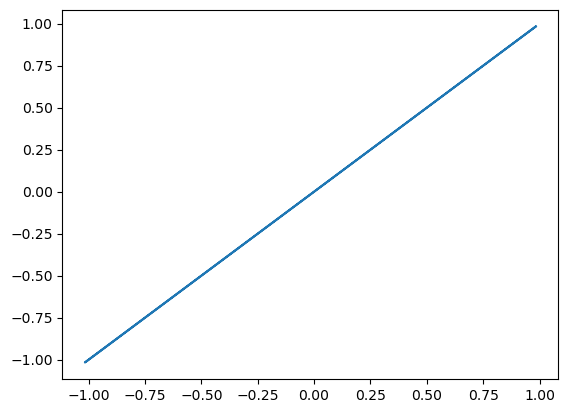

In [271]:
# set initial position and velocity 
r = np.array((9,3))
v = np.array((9,3))
f = open("initial_condition.txt", "r")
content = f.readlines()
f.close()
for i in range(9):
    line = content[i].replace('\n', '').split()
    r[i] = [float(line[0]), float(line[1]), float(line[2])]
    v[i] = [float(line[3]), float(line[4]), float(line[5])]

# Gravitational constant and Sun's mass
G = 2.959159*10**(-4)
M = 1

eccentricity = np.array([0.2056, 0.0068, 0.0167, 0.0934, 0.0484, 0.0541, 0.0472, 0.0086, 0.2488]) # from wikipedia

# analytic expression
def analytic(eceentricity, a, theta):
    theta = math.radians(theta) # convert to radian
    radius = a*(1-eccentricity**2)/(1+eccentricity*np.cos(theta))
    return radius*np.cos(theta),radius*np.cos(theta)

earth_x = []
earth_y = []

# earth 
for i in range(360):
    x,y = analytic(0.01671, 1, i)
    earth_x.append(x)
    earth_y.append(y)

plt.plot(earth_x, earth_y)

plt.show()

# 4
Proof of conservation of angular momentum

In [272]:
# define the position and velocity vector
r = sympy.symbols("r")
r_x = sympy.symbols("r_x")
r_y = sympy.symbols("r_y")
r_z = sympy.symbols("r_z")
v = sympy.symbols("v")
v_x = sympy.symbols("v_x")
v_y = sympy.symbols("v_y")
v_z = sympy.symbols("v_z")

# define timestep
dt = sympy.symbols("dt")

# define constants
G = sympy.symbols("G") # G constant
M = sympy.symbols("M") # mass of sun
m = sympy.symbols("m") # mass of planet

# create position and velocity vector
r = sympy.Matrix([r_x, r_y, r_z])
v = sympy.Matrix([v_x, v_y, v_z])

# calculate the accelaration 
def acc(position, grav_c, M_value):
    return grav_c*M_value*position/(position.dot(position))

# leapfrog step
def leap(position, velocity, step, grav_c, M_value):
    velocity = velocity + 0.5*step*acc(position, grav_c, M_value)
    position = position + velocity*step
    velocity = velocity + 0.5*step*acc(position, grav_c, M_value)

    return position, velocity

# calling leapfrog function to get new position and new velocity
new_r, new_v = leap(r, v, dt, G, M)
print(new_r) 
print(new_v)

# L = m*(x cross v)
L_before = m*sympy.simplify(r.cross(v))
L_after = m*sympy.simplify(new_r.cross(new_v))

# showing that angular momentum is conserved after leapfrog transformation
print(L_before.equals(L_after))


Matrix([[dt*(0.5*G*M*dt*r_x/(r_x**2 + r_y**2 + r_z**2) + v_x) + r_x], [dt*(0.5*G*M*dt*r_y/(r_x**2 + r_y**2 + r_z**2) + v_y) + r_y], [dt*(0.5*G*M*dt*r_z/(r_x**2 + r_y**2 + r_z**2) + v_z) + r_z]])
Matrix([[0.5*G*M*dt*r_x/(r_x**2 + r_y**2 + r_z**2) + 0.5*G*M*dt*(dt*(0.5*G*M*dt*r_x/(r_x**2 + r_y**2 + r_z**2) + v_x) + r_x)/((dt*(0.5*G*M*dt*r_x/(r_x**2 + r_y**2 + r_z**2) + v_x) + r_x)**2 + (dt*(0.5*G*M*dt*r_y/(r_x**2 + r_y**2 + r_z**2) + v_y) + r_y)**2 + (dt*(0.5*G*M*dt*r_z/(r_x**2 + r_y**2 + r_z**2) + v_z) + r_z)**2) + v_x], [0.5*G*M*dt*r_y/(r_x**2 + r_y**2 + r_z**2) + 0.5*G*M*dt*(dt*(0.5*G*M*dt*r_y/(r_x**2 + r_y**2 + r_z**2) + v_y) + r_y)/((dt*(0.5*G*M*dt*r_x/(r_x**2 + r_y**2 + r_z**2) + v_x) + r_x)**2 + (dt*(0.5*G*M*dt*r_y/(r_x**2 + r_y**2 + r_z**2) + v_y) + r_y)**2 + (dt*(0.5*G*M*dt*r_z/(r_x**2 + r_y**2 + r_z**2) + v_z) + r_z)**2) + v_y], [0.5*G*M*dt*r_z/(r_x**2 + r_y**2 + r_z**2) + 0.5*G*M*dt*(dt*(0.5*G*M*dt*r_z/(r_x**2 + r_y**2 + r_z**2) + v_z) + r_z)/((dt*(0.5*G*M*dt*r_x/(r_x**2 + r_y